# 역전파(Backpropagation) 실습

이 노트북은 간단한 신경망을 통해 역전파의 원리를 단계별로 이해하기 위한 실습 자료입니다.
NumPy만을 사용하여 순전파와 역전파 과정을 직접 구현해봅니다.


In [1]:
# 필요한 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt


## 1. 활성화 함수 정의


In [2]:
# 활성화 함수: 시그모이드(Sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 시그모이드 함수의 미분
def sigmoid_derivative(x):
    return x * (1 - x)

print("활성화 함수 정의 완료")


활성화 함수 정의 완료


## 2. 데이터 준비


In [3]:
# 입력 데이터 (X) 와 정답 (Y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]]) # XOR 문제

print("입력 데이터 X:")
print(X)
print("\n정답 데이터 Y:")
print(Y)


입력 데이터 X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

정답 데이터 Y:
[[0]
 [1]
 [1]
 [0]]


## 3. 신경망 구조 및 초기값 설정

- **입력층 (Input Layer)**: 2개의 노드
- **은닉층 (Hidden Layer)**: 2개의 노드
- **출력층 (Output Layer)**: 1개의 노드

각 연결에 대한 가중치(weight)와 편향(bias)을 무작위로 초기화합니다.


In [4]:
# 가중치와 편향 초기화
np.random.seed(42) # 재현성을 위한 시드 설정
weights_h = np.random.rand(2, 2)  # 입력층 -> 은닉층 가중치
bias_h = np.random.rand(1, 2)     # 은닉층 편향
weights_o = np.random.rand(2, 1)  # 은닉층 -> 출력층 가중치
bias_o = np.random.rand(1, 1)     # 출력층 편향

learning_rate = 0.1 # 학습률
epochs = 10000      # 학습 반복 횟수

print("신경망 구조:")
print(f"입력층 -> 은닉층 가중치 shape: {weights_h.shape}")
print(f"은닉층 편향 shape: {bias_h.shape}")
print(f"은닉층 -> 출력층 가중치 shape: {weights_o.shape}")
print(f"출력층 편향 shape: {bias_o.shape}")
print(f"\n학습률: {learning_rate}")
print(f"학습 반복 횟수: {epochs}")


신경망 구조:
입력층 -> 은닉층 가중치 shape: (2, 2)
은닉층 편향 shape: (1, 2)
은닉층 -> 출력층 가중치 shape: (2, 1)
출력층 편향 shape: (1, 1)

학습률: 0.1
학습 반복 횟수: 10000


## 4. 순전파(Forward Propagation) 함수


In [5]:
def forward_propagation(X, weights_h, bias_h, weights_o, bias_o):
    """
    순전파 함수
    
    Args:
        X: 입력 데이터
        weights_h: 입력층 -> 은닉층 가중치
        bias_h: 은닉층 편향
        weights_o: 은닉층 -> 출력층 가중치
        bias_o: 출력층 편향
    
    Returns:
        hidden_layer_output: 은닉층 출력
        predicted_output: 예측 출력
    """
    # 1. 입력층 -> 은닉층
    hidden_layer_input = np.dot(X, weights_h) + bias_h
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    # 2. 은닉층 -> 출력층
    output_layer_input = np.dot(hidden_layer_output, weights_o) + bias_o
    predicted_output = sigmoid(output_layer_input)
    
    return hidden_layer_output, predicted_output

print("순전파 함수 정의 완료")


순전파 함수 정의 완료


## 5. 역전파(Backpropagation) 함수


In [6]:
def backward_propagation(X, Y, hidden_layer_output, predicted_output, weights_o):
    """
    역전파 함수
    
    Args:
        X: 입력 데이터
        Y: 정답 데이터
        hidden_layer_output: 은닉층 출력
        predicted_output: 예측 출력
        weights_o: 은닉층 -> 출력층 가중치
    
    Returns:
        d_weights_h: 입력층 -> 은닉층 가중치 기울기
        d_bias_h: 은닉층 편향 기울기
        d_weights_o: 은닉층 -> 출력층 가중치 기울기
        d_bias_o: 출력층 편향 기울기
    """
    # 1. 출력층의 델타 계산
    error = Y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    # 2. 은닉층의 오차 계산 (출력층 델타를 역전파)
    error_hidden_layer = d_predicted_output.dot(weights_o.T)
    
    # 3. 은닉층의 델타 계산
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # 4. 가중치와 편향의 기울기 계산
    d_weights_o = hidden_layer_output.T.dot(d_predicted_output)
    d_bias_o = np.sum(d_predicted_output, axis=0, keepdims=True)
    d_weights_h = X.T.dot(d_hidden_layer)
    d_bias_h = np.sum(d_hidden_layer, axis=0, keepdims=True)
    
    return d_weights_h, d_bias_h, d_weights_o, d_bias_o

print("역전파 함수 정의 완료")


역전파 함수 정의 완료


## 6. 학습 과정 실행


In [7]:
# 학습 과정을 위한 변수 초기화
losses = []

print("학습 시작...")
print("=" * 50)

for i in range(epochs):
    # --- 순전파 (Forward Pass) --- 
    hidden_layer_output, predicted_output = forward_propagation(X, weights_h, bias_h, weights_o, bias_o)
    
    # --- 손실 계산 (Mean Squared Error) ---
    error = Y - predicted_output
    loss = np.mean(error**2)
    losses.append(loss)
    
    # --- 역전파 (Backward Pass) --- 
    d_weights_h, d_bias_h, d_weights_o, d_bias_o = backward_propagation(
        X, Y, hidden_layer_output, predicted_output, weights_o
    )
    
    # --- 가중치 및 편향 업데이트 --- 
    weights_o += d_weights_o * learning_rate
    bias_o += d_bias_o * learning_rate
    weights_h += d_weights_h * learning_rate
    bias_h += d_bias_h * learning_rate
    
    if i % 1000 == 0:
        print(f"Epoch {i:5d}, Loss: {loss:.6f}")

print("=" * 50)
print("학습 완료!")


학습 시작...
Epoch     0, Loss: 0.324659
Epoch  1000, Loss: 0.240589
Epoch  2000, Loss: 0.196030
Epoch  3000, Loss: 0.120663
Epoch  4000, Loss: 0.030459
Epoch  5000, Loss: 0.012541
Epoch  6000, Loss: 0.007368
Epoch  7000, Loss: 0.005093
Epoch  8000, Loss: 0.003847
Epoch  9000, Loss: 0.003071
학습 완료!


## 7. 학습 결과 확인


In [8]:
# 최종 예측 결과
_, final_prediction = forward_propagation(X, weights_h, bias_h, weights_o, bias_o)

print("\n--- 학습 후 예측 결과 ---")
print("입력값:")
print(X)
print("\n정답:")
print(Y.flatten())
print("\n예측값:")
print(final_prediction.flatten().round(4))
print("\n예측값 (반올림):")
print(final_prediction.flatten().round(0).astype(int))



--- 학습 후 예측 결과 ---
입력값:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

정답:
[0 1 1 0]

예측값:
[0.0532 0.9517 0.9516 0.0517]

예측값 (반올림):
[0 1 1 0]


## 8. 손실 함수 시각화


/home/jiwoonkim/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiwoonkim/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiwoonkim/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiwoonkim/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiwoonkim/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sa

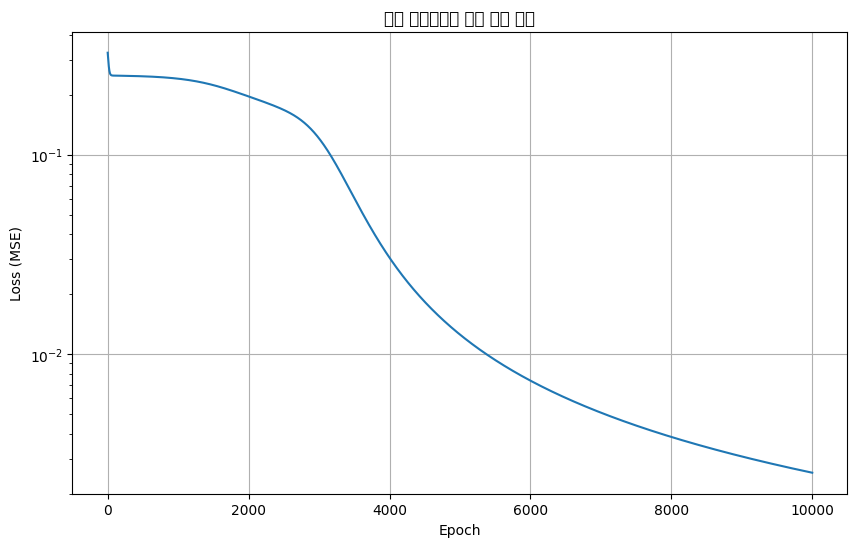

최종 손실: 0.002546
초기 손실: 0.324659
손실 감소율: 99.22%


In [9]:
# 손실 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('학습 과정에서의 손실 함수 변화')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.yscale('log')  # 로그 스케일로 표시
plt.show()

print(f"최종 손실: {losses[-1]:.6f}")
print(f"초기 손실: {losses[0]:.6f}")
print(f"손실 감소율: {((losses[0] - losses[-1]) / losses[0] * 100):.2f}%")


## 9. 학습된 가중치 확인


In [10]:
print("\n--- 학습된 가중치와 편향 ---")
print("\n입력층 -> 은닉층 가중치:")
print(weights_h)
print("\n은닉층 편향:")
print(bias_h)
print("\n은닉층 -> 출력층 가중치:")
print(weights_o)
print("\n출력층 편향:")
print(bias_o)



--- 학습된 가중치와 편향 ---

입력층 -> 은닉층 가중치:
[[3.79198478 5.81661184]
 [3.80004873 5.8545897 ]]

은닉층 편향:
[[-5.82020057 -2.46277158]]

은닉층 -> 출력층 가중치:
[[-8.32186051]
 [ 7.66063503]]

출력층 편향:
[[-3.45550373]]


## 10. XOR 문제 해결 확인


In [11]:
# XOR 문제 해결 여부 확인
print("\n--- XOR 문제 해결 확인 ---")
print("입력1 | 입력2 | 정답 | 예측 | 정확도")
print("-" * 40)

correct = 0
for i in range(len(X)):
    input1, input2 = X[i]
    true_label = int(Y[i][0])
    predicted_label = int(final_prediction[i][0].round())
    accuracy = "✓" if true_label == predicted_label else "✗"
    
    if true_label == predicted_label:
        correct += 1
    
    print(f"  {input1}   |   {input2}   |  {true_label}   |   {predicted_label}   |   {accuracy}")

print("-" * 40)
print(f"전체 정확도: {correct}/{len(X)} = {correct/len(X)*100:.1f}%")



--- XOR 문제 해결 확인 ---
입력1 | 입력2 | 정답 | 예측 | 정확도
----------------------------------------
  0   |   0   |  0   |   0   |   ✓
  0   |   1   |  1   |   1   |   ✓
  1   |   0   |  1   |   1   |   ✓
  1   |   1   |  0   |   0   |   ✓
----------------------------------------
전체 정확도: 4/4 = 100.0%
